# Problem Statement

* The revenue of the Portuguese bank has declined. 
* Clients aren't depositing as regularly. 
* Furthermore,banks have a higher chance of convincing term deposit consumers to purchase other products such as funds or         insurance in order to raise their income. 
* The bank would like to identify existing clients who are more likely to sign up for a term deposit and focus marketing efforts   on them.

# Agenda

* The task is to build a POC for the problem
* Understanding Data
* Data Preparation
* Choose relevant features
* Missing value analysis
* Visuaization
* Data standardization
* One Hot Encoding

* SMOTING


##### Models Performing


* Decision Tree Classifier
* Random Forest Calssifier
* AdaBoost
* Gradient Boost
* XGBoost

In [1]:
# importing libraries

import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
# import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv("E:/studies/methods and algorithms in machine learning - 2/end-term_hackathon/bank-additional-full.csv")

In [3]:
bank

,customer_no,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41184,73,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,41186,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,41187,44,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
bank.shape

(41188, 22)

In [5]:
bank.columns

Index(['customer_no', 'age', 'job', 'marital', 'education', 'credit_default',
       'housing', 'loan', 'contact', 'contacted_month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_no      41188 non-null  int64  
 1   age              41188 non-null  int64  
 2   job              41188 non-null  object 
 3   marital          41188 non-null  object 
 4   education        41188 non-null  object 
 5   credit_default   41188 non-null  object 
 6   housing          41188 non-null  object 
 7   loan             41188 non-null  object 
 8   contact          41188 non-null  object 
 9   contacted_month  41188 non-null  object 
 10  day_of_week      41188 non-null  object 
 11  duration         41188 non-null  int64  
 12  campaign         41188 non-null  int64  
 13  pdays            41188 non-null  int64  
 14  previous         41188 non-null  int64  
 15  poutcome         41188 non-null  object 
 16  emp_var_rate     41188 non-null  float64
 17  cons_price_i

In [7]:
(bank["y"].value_counts()/41188)*100

#88% of the data has not subscribed for term deposit. Only 11%  of data are subscribed for term deposit. So We can say it is imbalanced data.

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [8]:
bank.isna().sum()

customer_no        0
age                0
job                0
marital            0
education          0
credit_default     0
housing            0
loan               0
contact            0
contacted_month    0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp_var_rate       0
cons_price_idx     0
cons_conf_idx      0
euribor3m          0
nr_employed        0
y                  0
dtype: int64

In [9]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
def understand_data(bank) :
    return(pd.DataFrame({"Datatype":bank.dtypes,
                         "No of NAs":bank.isna().sum(),
                         "No of Levels":bank.apply(lambda x: x.nunique(),axis=0),
                         "Levels":bank.apply(lambda x: str(x.unique()),axis=0)}))

In [11]:
understand_data(bank)

,Datatype,No of NAs,No of Levels,Levels
customer_no,int64,0,41188,[ 1 2 3 ... 41186 41187 41188]
age,int64,0,78,[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 ...
job,object,0,12,['housemaid' 'services' 'admin.' 'blue-collar'...
marital,object,0,4,['married' 'single' 'divorced' 'unknown']
education,object,0,9,['basic.4y' 'high.school' 'basic.6y' 'basic.9y...
credit_default,object,0,3,['no' 'unknown' 'yes']
housing,object,0,3,['no' 'yes' 'unknown']
loan,object,0,3,['no' 'yes' 'unknown']
contact,object,0,2,['telephone' 'cellular']
contacted_month,object,0,10,['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'ma...


In [12]:
bank.describe()

,customer_no,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,11890.09578,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,1.00000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10297.75000,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20594.50000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30891.25000,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41188.00000,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
bank.loc[bank.duplicated(), :]

,customer_no,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


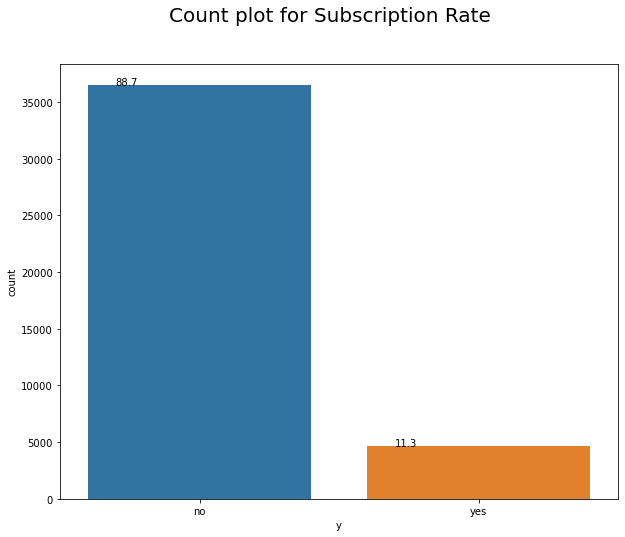

In [14]:
plt.figure(figsize= (10,8))
ax = sns.countplot(bank["y"])
plt.suptitle("Count plot for Subscription Rate", fontsize= 20)

for p in ax.patches:
        ax.annotate('{:.1f}'.format((p.get_height()/41188)*100), (p.get_x()+0.1, p.get_height()))
        
#88% of the data has not subscribed for term deposit. Only 11%  of data are subscribed for term deposit. So We can say it is imbalanced data.

In [15]:
for col in bank.select_dtypes(include = 'object').columns:
    print('  ')
    print(col)
   
    print(bank[col].unique())

  
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
  
marital
['married' 'single' 'divorced' 'unknown']
  
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'phd' 'illiterate']
  
credit_default
['no' 'unknown' 'yes']
  
housing
['no' 'yes' 'unknown']
  
loan
['no' 'yes' 'unknown']
  
contact
['telephone' 'cellular']
  
contacted_month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
  
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
  
poutcome
['nonexistent' 'failure' 'success']
  
y
['no' 'yes']


In [16]:
bank['education']=np.where(bank['education'] =='basic.9y','Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.6y','Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.4y','Basic', bank['education'])
bank['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'phd', 'illiterate'], dtype=object)

In [17]:
# dropping customer_no column
bank.drop(['customer_no'],axis=1,inplace=True)

In [18]:
bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [19]:
bank

,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [20]:
categorical_attr = bank[["job","marital","education","credit_default","housing","loan","contact","contacted_month","day_of_week","poutcome"]]

In [21]:
categorical_attr

,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,poutcome
0,housemaid,married,Basic,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,Basic,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


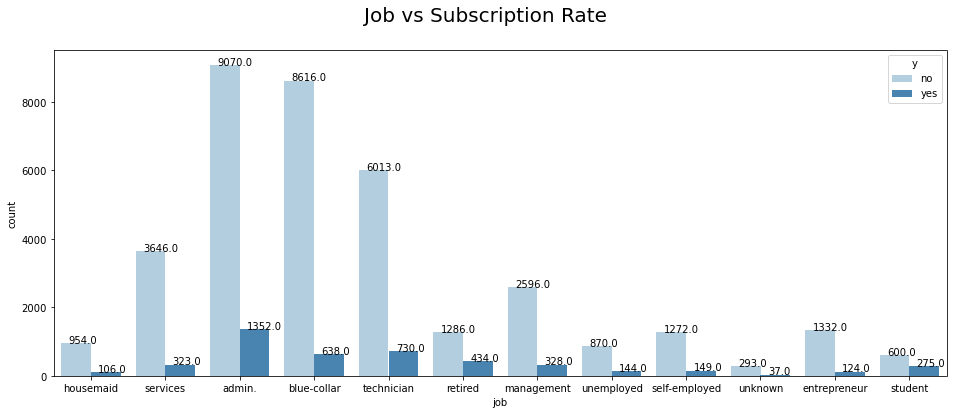

In [22]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=bank,x='job',hue='y',palette='Blues')
plt.suptitle("Job vs Subscription Rate", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

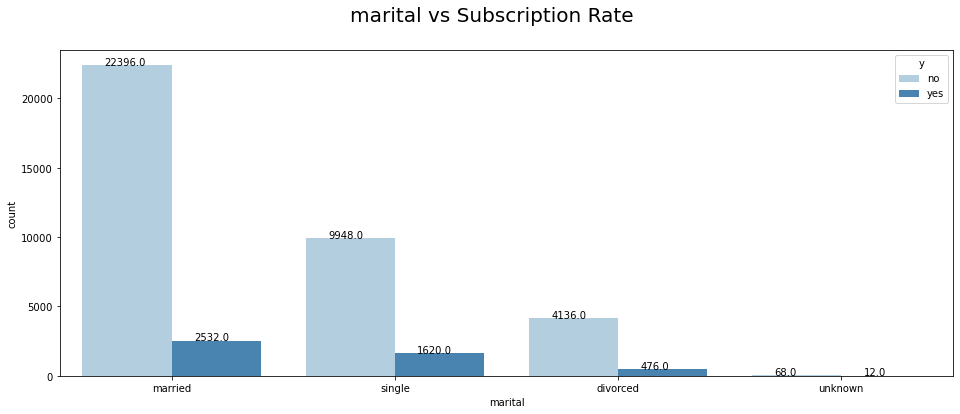

In [23]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=bank,x='marital',hue='y',palette='Blues')
plt.suptitle("marital vs Subscription Rate", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

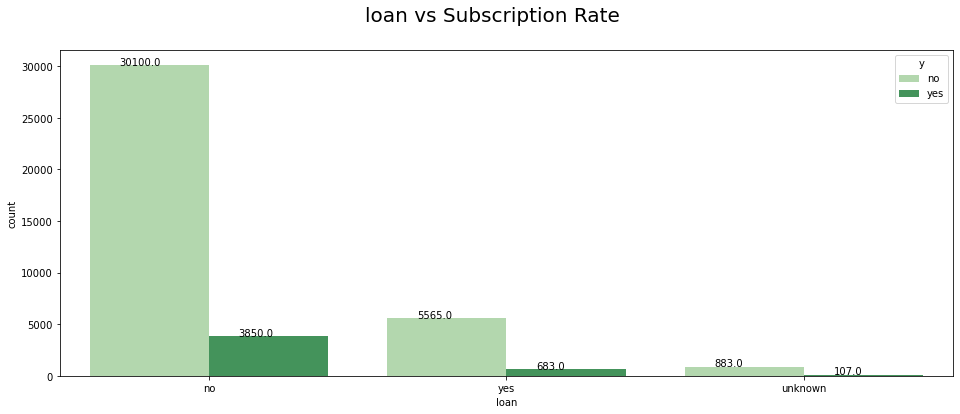

In [24]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=bank,x='loan',hue='y',palette='Greens')
plt.suptitle("loan vs Subscription Rate", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

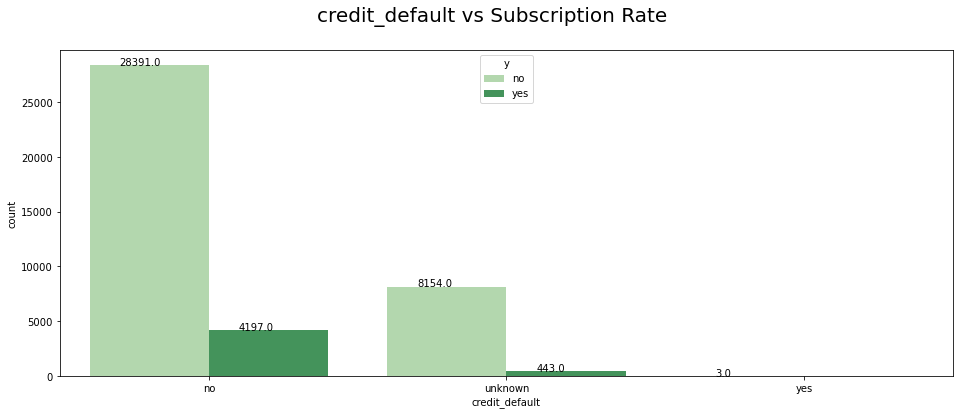

In [25]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=bank,x='credit_default',hue='y',palette='Greens')
plt.suptitle("credit_default vs Subscription Rate", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

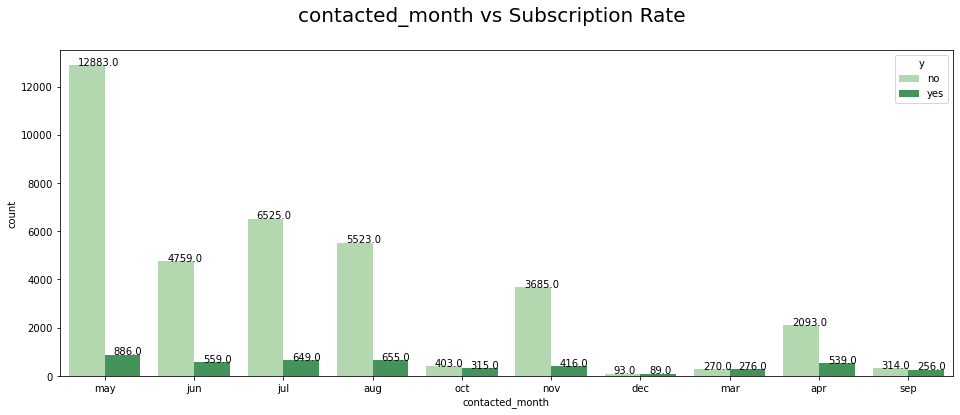

In [26]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=bank,x='contacted_month',hue='y',palette='Greens')
plt.suptitle("contacted_month vs Subscription Rate", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

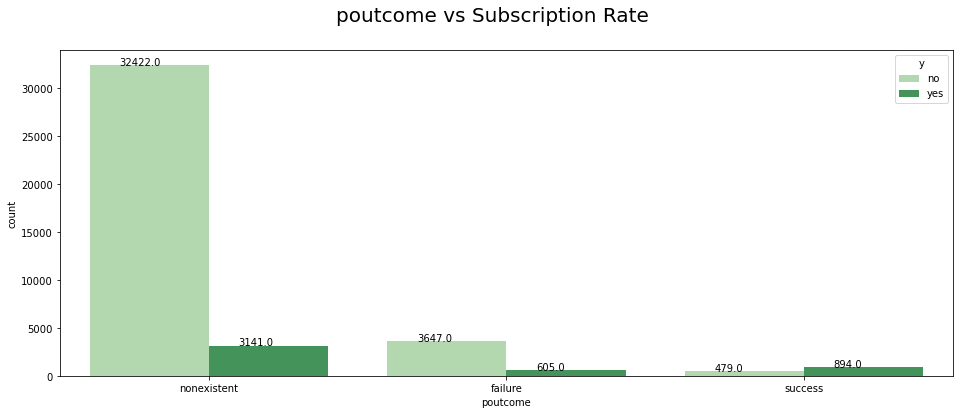

In [27]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=bank,x='poutcome',hue='y',palette='Greens')
plt.suptitle("poutcome vs Subscription Rate", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

In [28]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))
    print("f1_score : ", f1_score(act,pred))
    print(" ")

# Splitting the Data

In [30]:
X=bank.drop('y',axis=1)
y=bank['y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28831, 20)
(12357, 20)
(28831,)
(12357,)


In [32]:
print(pd.value_counts(y_train)/y_train.count()*100)
print(pd.value_counts(y_test)/y_test.count()*100)

no     88.748222
yes    11.251778
Name: y, dtype: float64
no     88.70276
yes    11.29724
Name: y, dtype: float64


# Label Encoding

In [33]:
le = LabelEncoder()

In [34]:
le.fit(y_train)

LabelEncoder()

In [35]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [36]:
y_train

array([0, 1, 0, ..., 0, 0, 1])

In [37]:
pd.Series(y_train).value_counts()

0    25587
1     3244
dtype: int64

In [38]:
print(pd.value_counts(y_train)/y_train.size *100)

0    88.748222
1    11.251778
dtype: float64


In [39]:
num_attr = X_train.select_dtypes(include=['float64','int64']).columns
num_attr

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

# Standardizing the numerical attributes

In [40]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [41]:
X_train_std = pd.DataFrame(scaler.transform(X_train[num_attr]))
X_test_std = pd.DataFrame(scaler.transform(X_test[num_attr]))

In [42]:
print(X_train_std)

              0         1         2         3         4         5         6  \
0      0.479897  0.233079 -0.573111  0.195559 -0.348328  0.640729  0.716223   
1     -1.058517  7.050209  1.268589  0.195559 -0.348328  0.832074 -0.233354   
2      0.576048 -0.475595  0.163569  0.195559 -0.348328  0.640729  0.716223   
3     -0.289310  0.999524 -0.573111  0.195559 -0.348328  0.640729  0.716223   
4      1.345255 -0.356199  0.163569  0.195559 -0.348328  0.640729  0.716223   
...         ...       ...       ...       ...       ...       ...       ...   
28826 -1.346969 -0.718238  0.163569  0.195559 -0.348328  0.832074  1.529407   
28827  0.287595 -0.125110 -0.573111  0.195559 -0.348328  0.832074  0.585009   
28828  1.345255 -0.155922 -0.573111  0.195559 -0.348328  0.832074  0.585009   
28829 -0.097008  1.307643 -0.204771  0.195559  3.684053 -1.208936 -0.870434   
28830 -0.385461  2.293624 -0.573111  0.195559 -0.348328  0.832074  0.585009   

              7         8         9  
0      0.8794

# One Hot Encoding for categorical attributes

In [43]:
cat_attr = X_train.select_dtypes(include='category').columns

In [44]:
enc = OneHotEncoder(drop='first')
enc.fit(X_train[cat_attr])

OneHotEncoder(drop='first')

In [45]:
X_train_ohe = enc.transform(X_train[cat_attr]).toarray()
X_test_ohe = enc.transform(X_test[cat_attr]).toarray()

In [46]:
X_train_con = np.concatenate([X_train_std,X_train_ohe],axis=1)
X_test_con = np.concatenate([X_test_std,X_test_ohe],axis=1)

In [47]:
X_train_con

array([[ 0.47989721,  0.23307856, -0.5731109 , ...,  0.87944421,
         0.70376783,  0.32416426],
       [-1.05851654,  7.05020891,  1.26858869, ...,  0.94430855,
         0.76741768,  0.84028392],
       [ 0.57604806, -0.47559488,  0.16356894, ...,  0.87944421,
         0.70608237,  0.32416426],
       ...,
       [ 1.34525494, -0.15592153, -0.5731109 , ..., -0.48270702,
         0.76510314,  0.84028392],
       [-0.09700795,  1.30764318, -0.20477098, ..., -1.43405074,
        -1.24738927, -0.95431005],
       [-0.38546053,  2.29362361, -0.5731109 , ..., -0.48270702,
         0.7645245 ,  0.84028392]])

# Smoting

In [48]:
smote = SMOTE(random_state=123)

In [49]:
X_train_sm, y_train_sm = smote.fit_resample(X_train_con, y_train)

In [50]:
X_train_con

array([[ 0.47989721,  0.23307856, -0.5731109 , ...,  0.87944421,
         0.70376783,  0.32416426],
       [-1.05851654,  7.05020891,  1.26858869, ...,  0.94430855,
         0.76741768,  0.84028392],
       [ 0.57604806, -0.47559488,  0.16356894, ...,  0.87944421,
         0.70608237,  0.32416426],
       ...,
       [ 1.34525494, -0.15592153, -0.5731109 , ..., -0.48270702,
         0.76510314,  0.84028392],
       [-0.09700795,  1.30764318, -0.20477098, ..., -1.43405074,
        -1.24738927, -0.95431005],
       [-0.38546053,  2.29362361, -0.5731109 , ..., -0.48270702,
         0.7645245 ,  0.84028392]])

In [51]:
np.unique(y_train, return_counts= True)

(array([0, 1]), array([25587,  3244], dtype=int64))

In [52]:
np.unique(y_train_sm, return_counts= True)

(array([0, 1]), array([25587, 25587], dtype=int64))

# Decision Trees

In [53]:
clf_dt = DecisionTreeClassifier(max_depth=6)
clf_dt.fit(X_train_sm, y_train_sm)

y_pred_train = clf_dt.predict(X_train_sm)
y_pred_test = clf_dt.predict(X_test_con)

evaluate_model(y_train_sm,y_pred_train)
evaluate_model(y_test,y_pred_test)


Confusion Matrix 
 [[22080  3507]
 [ 1768 23819]]
Accurcay :  0.8969203110954782
Recall   :  0.9309024113807793
Precision:  0.8716606894532679
f1_score :  0.9003080528414567
 
Confusion Matrix 
 [[9384 1577]
 [ 141 1255]]
Accurcay :  0.8609694909767743
Recall   :  0.8989971346704871
Precision:  0.4431497175141243
f1_score :  0.5936613055818354
 


# Random Forest Classifier

In [54]:
clf_rf = RandomForestClassifier(n_estimators=20)

clf_rf.fit(X_train_sm, y_train_sm)
y_pred_train = clf_rf.predict(X_train_sm)


y_pred_test = clf_rf.predict(X_test_con)

evaluate_model(y_train_sm,y_pred_train)
evaluate_model(y_test,y_pred_test)

Confusion Matrix 
 [[25557    30]
 [   21 25566]]
Accurcay :  0.9990034001641459
Recall   :  0.9991792707234143
Precision:  0.9988279418659165
f1_score :  0.9990035754058965
 
Confusion Matrix 
 [[10127   834]
 [  435   961]]
Accurcay :  0.8973051711580481
Recall   :  0.6883954154727794
Precision:  0.5353760445682452
f1_score :  0.6023190222500784
 


# Adaboost Classifier

In [55]:
# Create adaboost-decision tree classifer object

clf_adaboost =  AdaBoostClassifier(n_estimators = 600,
    learning_rate = 0.4)

clf_adaboost.fit(X_train_sm, y_train_sm)

y_pred_train = clf_rf.predict(X_train_sm)
y_pred_test = clf_rf.predict(X_test_con)

evaluate_model(y_train_sm,y_pred_train)
evaluate_model(y_test,y_pred_test)

Confusion Matrix 
 [[25557    30]
 [   21 25566]]
Accurcay :  0.9990034001641459
Recall   :  0.9991792707234143
Precision:  0.9988279418659165
f1_score :  0.9990035754058965
 
Confusion Matrix 
 [[10127   834]
 [  435   961]]
Accurcay :  0.8973051711580481
Recall   :  0.6883954154727794
Precision:  0.5353760445682452
f1_score :  0.6023190222500784
 


# Gradient Boosting Classifier

In [56]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [57]:
%time GBM_model.fit(X_train_sm, y_train_sm)

CPU times: total: 3.53 s
Wall time: 8.17 s


GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [58]:
y_pred_train = GBM_model.predict(X_train_sm)
y_pred_test = GBM_model.predict(X_test_con)

In [59]:
evaluate_model(y_train_sm,y_pred_train)
evaluate_model(y_test,y_pred_test)

Confusion Matrix 
 [[22797  2790]
 [ 1273 24314]]
Accurcay :  0.9206042130769532
Recall   :  0.950248172900301
Precision:  0.8970631641086186
f1_score :  0.9228900571255053
 
Confusion Matrix 
 [[9671 1290]
 [ 182 1214]]
Accurcay :  0.8808772355749778
Recall   :  0.8696275071633238
Precision:  0.48482428115015974
f1_score :  0.6225641025641027
 


# XG Boost Classifier

In [60]:
from xgboost import XGBClassifier

In [61]:
XGB_model = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1)
%time XGB_model.fit(X_train_sm, y_train_sm)

CPU times: total: 1min 40s
Wall time: 15.8 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
y_pred_train = XGB_model.predict(X_train_sm)
y_pred_test = XGB_model.predict(X_test_con)

In [63]:
evaluate_model(y_train_sm,y_pred_train)
evaluate_model(y_test,y_pred_test)

Confusion Matrix 
 [[24783   804]
 [  622 24965]]
Accurcay :  0.9721342869425881
Recall   :  0.9756907804744597
Precision:  0.9687997205945128
f1_score :  0.9722330399563828
 
Confusion Matrix 
 [[10266   695]
 [  470   926]]
Accurcay :  0.9057214534272072
Recall   :  0.663323782234957
Precision:  0.5712523133867983
f1_score :  0.613854822671528
 
